In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pylab
import math
import random
import sklearn


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import is_numeric_dtype

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit


from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from math import sqrt

from catboost import CatBoostRegressor
from catboost import Pool, cv

%matplotlib inline

In [2]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры_Краснодар/Выборка_Краснодар.xlsx', sheet_name = 0)
df

,ID,All,Мусор,Мусор_1,Мусор_2,Прогноз(0.5),Прогноз(0.32),pred_proba_2,pred_proba_1,Цена,...,Сцепка_к,Исп.2,Unnamed: 63,Сцепка_3,Д_ад,Д_ya,Сравнение,Поиск,Текст,Ссылка
0,1_avito,1,0,NaN,NaN,NaN,NaN,NaN,NaN,12000000,...,,NaN,NaN,9,3к2,NaN,NaN,0.0,"Продается отличная, большая, просторная кварти...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
1,2_avito,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3700000,...,39.005982 45.099499,NaN,NaN,11 39.005982 45.099499,13,13,1.0,0.0,Продаётся уютная квартира в шикарном жк Победн...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
2,3_avito,0,0,0.0,0.0,0.0,0.0,0.005016,0.994984,8399000,...,39.036192 45.010981,NaN,3.0,5 39.036192 45.010981,132,132,1.0,0.0,"Продам 3-комнатную квартиру с Евроремонтом, 65...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
3,4_avito,1,0,NaN,NaN,NaN,NaN,NaN,NaN,12300000,...,,NaN,NaN,4,39/2,NaN,NaN,0.0,Срочная Продажа! Продается большая трехкомнатн...,https://www.avito.ru/krasnodar/kvartiry/3-k._k...
4,5_avito,0,0,0.0,0.0,0.0,0.0,0.060823,0.939177,11000000,...,38.970992 45.101935,NaN,17.0,15 38.970992 45.101935,4/4,4/4,1.0,0.0,"Собственник! Продаю без посредников, Квартира ...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34263,34260_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,6100000,...,39.03868 45.079091,NaN,72.0,4 39.03868 45.079091,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10785272/
34264,34261_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5998000,...,39.043307 45.078162,NaN,32.0,17 39.043307 45.078162,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10541705/
34265,34262_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5500000,...,39.03868 45.079091,NaN,72.0,17 39.03868 45.079091,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10355115/
34266,34259_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5369000,...,39.03868 45.079091,NaN,72.0,20 39.03868 45.079091,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10328304/


In [3]:
df_1 = df[df['All'] == 0]
df_1 = df_1[df_1['Прогноз(0.32)'] == 0]
# df = df[df['dup_res'] == 0]
# df = df[df['Выброс_итог'] == 0]

#df = df[df['LN(Цена)'] <= 18]
#df = df[df['LN(Цена)'] >= 14.5]

df_1.reset_index(drop = True, inplace = True)
df_1

,ID,All,Мусор,Мусор_1,Мусор_2,Прогноз(0.5),Прогноз(0.32),pred_proba_2,pred_proba_1,Цена,...,Сцепка_к,Исп.2,Unnamed: 63,Сцепка_3,Д_ад,Д_ya,Сравнение,Поиск,Текст,Ссылка
0,3_avito,0,0,0.0,0.0,0.0,0.0,0.005016,0.994984,8399000,...,39.036192 45.010981,NaN,3.0,5 39.036192 45.010981,132,132,1.0,0.0,"Продам 3-комнатную квартиру с Евроремонтом, 65...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
1,5_avito,0,0,0.0,0.0,0.0,0.0,0.060823,0.939177,11000000,...,38.970992 45.101935,NaN,17.0,15 38.970992 45.101935,4/4,4/4,1.0,0.0,"Собственник! Продаю без посредников, Квартира ...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
2,6_avito,0,0,0.0,0.0,0.0,0.0,0.047736,0.952264,3999999,...,38.905658 45.093702,NaN,45.0,9 38.905658 45.093702,39/2,39/2,1.0,0.0,Агентам не Беспокоить. Дешевле чем от застройщ...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
3,9_avito,0,0,0.0,0.0,0.0,0.0,0.018983,0.981017,2850000,...,39.029275 45.097119,NaN,7.0,2 39.029275 45.097119,5к3,5к3,1.0,0.0,"Продажа от собственника, никаких риелтор них к...",https://www.avito.ru/krasnodar/kvartiry/kvarti...
4,10_avito,0,0,0.0,0.0,0.0,0.0,0.028921,0.971079,3400000,...,38.897878 45.077226,NaN,13.0,7 38.897878 45.077226,1/3к7,1/3к7,1.0,0.0,Продаётся уютная студия в ЖК« Светлоград» от с...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,34260_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,6100000,...,39.03868 45.079091,NaN,72.0,4 39.03868 45.079091,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10785272/
12261,34261_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5998000,...,39.043307 45.078162,NaN,32.0,17 39.043307 45.078162,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10541705/
12262,34262_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5500000,...,39.03868 45.079091,NaN,72.0,17 39.03868 45.079091,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10355115/
12263,34259_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5369000,...,39.03868 45.079091,NaN,72.0,20 39.03868 45.079091,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10328304/


In [4]:
df_1['ГП_1'] = df_1['ГП_1'].astype(int) #обращаю внимание, что год постройки воспринимался как object

In [5]:
#df['ГП_2'].info()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12265 entries, 0 to 12264
Data columns (total 71 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                12265 non-null  object 
 1   All               12265 non-null  int64  
 2   Мусор             12265 non-null  int64  
 3   Мусор_1           12265 non-null  float64
 4   Мусор_2           12265 non-null  float64
 5   Прогноз(0.5)      12265 non-null  float64
 6   Прогноз(0.32)     12265 non-null  float64
 7   pred_proba_2      12259 non-null  float64
 8   pred_proba_1      12259 non-null  float64
 9   Цена              12265 non-null  int64  
 10  Цена_перв         86 non-null     float64
 11  LN(Цена)          12265 non-null  float64
 12  Цена(кв.м)        12265 non-null  float64
 13  Цена_об           12259 non-null  object 
 14  Прогноз           12265 non-null  float64
 15  Цена(кв.м).1      12265 non-null  float64
 16  MAE               12265 non-null  float6

interval columns not set, guessing: ['Цена', 'LN(Цена)', 'ОПлощадь', 'Этаж_1', 'Этажность_1', 'ГП_1', 'Многоуровневость', 'Терраса', 'Раст_центр_1']


<AxesSubplot: >

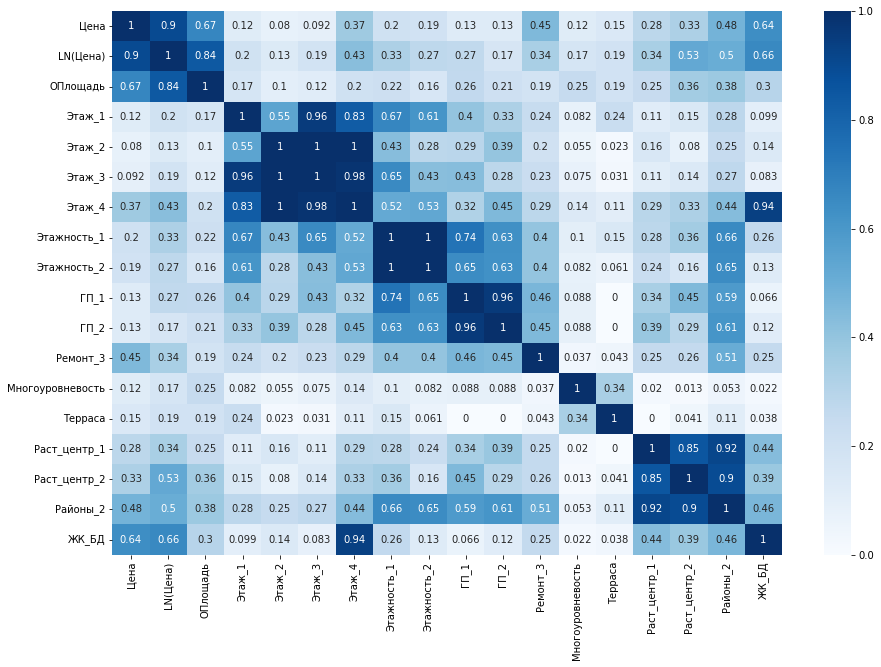

In [6]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

phik_overview = df_1[['Цена', 'LN(Цена)', 'ОПлощадь', 'Этаж_1', 'Этаж_2', 'Этаж_3', 'Этаж_4', 'Этажность_1', 'Этажность_2', 
                    'ГП_1', 'ГП_2', 'Ремонт_3', 'Многоуровневость', 'Терраса', 'Раст_центр_1', 'Раст_центр_2', 'Районы_2', 
                    'ЖК_БД']].phik_matrix()
plt.figure(figsize = (15, 10))

sns.heatmap(phik_overview, annot = True, cmap = "Blues")

In [7]:
X = df_1[[
            'ОПлощадь',
            #'Этаж_1',
            #'Этаж_2',
            #'Этаж_3',
            'Этаж_4',
            'Этажность_1',
            #'Этажность_2',
            'ГП_1',
            #'Ремонт_2',
            'Ремонт_3',
            #'Долгота',
            #'Широта',
            #'Раст_центр_1',
            'Раст_центр_2',
            'Районы_2',
            'Многоуровневость',
            'Терраса',
            'ЖК_БД'
      ]]

Y = df_1['LN(Цена)']

def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

cat_features = get_categorical_indicies(X)
print(cat_features)

[1, 4, 5, 6, 9]


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12265 entries, 0 to 12264
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ОПлощадь          12265 non-null  float64
 1   Этаж_4            12265 non-null  object 
 2   Этажность_1       12265 non-null  int64  
 3   ГП_1              12265 non-null  int32  
 4   Ремонт_3          12265 non-null  object 
 5   Раст_центр_2      12265 non-null  object 
 6   Районы_2          12265 non-null  object 
 7   Многоуровневость  12265 non-null  int64  
 8   Терраса           12265 non-null  int64  
 9   ЖК_БД             12265 non-null  object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 910.4+ KB


In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

#n_folds = 7
#kf = KFold(n_splits = n_folds,  = False, random_state = 0)

catb = CatBoostRegressor(
         iterations = 3500, #максимальное количество построенных деревьев
         random_seed = 6, 
         learning_rate = 0.01, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
         max_depth = 5, #глубина дерева
         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
         #l2_leaf_reg = 20, #коэффициент при члене регуляризации L2 функции потерь
         #bagging_temperature = 1,
         #random_strength = 1,
         one_hot_max_size = 30, #не используем one hot encoding, а включаем one_hot_max_size
         #loss_function = 'MAE', #по умолчанию
         #eval_metric = 'MAPE', #MAPE
         #od_type = 'Iter', #если модель переобучилась
         #od_wait = 20
        ) #делай остановку через 20 итераций
         #если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
         #если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

shuffle_split = ShuffleSplit(n_splits = 10, test_size = 0.15, random_state = 0)

#массив для сохранения итоговых оценок
all_rmse = [] 
all_mae = []
all_mape = []
all_r2 = []

tr = []
te = []

for n, (tr_index, te_index) in enumerate(shuffle_split.split(X, Y)): #kf.split(X, Y)
    print('Обработка процесса №', n)
    
    tr.append(tr_index)
    te.append(te_index)
    
    # Split data and target
    X_train = X.iloc[tr_index]
    Y_train = Y.iloc[tr_index]
    X_test = X.iloc[te_index]
    Y_test = Y.iloc[te_index]


    catb.fit(X_train, Y_train, 
             cat_features = cat_features, #массив с индексами категориальных фичей
             eval_set = (X_test, Y_test),
             verbose = False, 
             #plot = True
            ) #включение графика
 
    pred_test = np.exp(catb.predict(X_test))
    mse_test = mse(np.exp(Y_test), pred_test)
    
    all_rmse.append(round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
    all_mae.append(round(mae(np.exp(Y_test), pred_test), 4))
    all_mape.append(round(mape(np.exp(Y_test), pred_test), 4))
    all_r2.append(r2_score(np.exp(Y_test), pred_test))

Обработка процесса № 0


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 1


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 2


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 3


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 4


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 5


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 6


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 7


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 8


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 9


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [10]:
# массив оценок по k блокам
print('MAE:', all_mae)
print('RMSE:', all_rmse)
print('MAPE:', all_mape)
print('R2:', all_r2)

MAE: [720330.1786, 713101.1462, 726383.6172, 696576.0137, 697201.6733, 706513.5535, 694605.6869, 736761.6133, 755197.2454, 742453.3027]
RMSE: [1105899.4325, 1031179.2346, 1065160.8667, 1008736.4004, 1004459.5719, 1081620.3551, 984422.9798, 1071437.9795, 1121863.4457, 1132409.5343]
MAPE: [0.0938, 0.0957, 0.0965, 0.093, 0.0933, 0.0939, 0.0938, 0.0968, 0.0978, 0.0945]
R2: [0.9395363006702716, 0.9383262386602109, 0.9347260959647566, 0.9409050197294295, 0.936170575912457, 0.9422649477823075, 0.9414429565734291, 0.9434938009607124, 0.9315681964838557, 0.9335722500989442]


In [11]:
# среднее значение mae
print('MAE_mean:', np.mean(all_mae))
print('RMSE_mean:', np.mean(all_rmse))
print('MAPE_mean:', np.mean(all_mape))
print('R2_mean:', np.mean(all_r2))

MAE_mean: 718912.40308
RMSE_mean: 1060718.98005
MAPE_mean: 0.09491
R2_mean: 0.9382006382836374


In [ ]:
#Первоначально
MAE_mean: 875132.3831
RMSE_mean: 1480191.23547
MAPE_mean: 0.11004
R2_mean: 0.9063605718434079
    
#После анализа ошибок
MAE_mean: 718912.40308
RMSE_mean: 1060718.98005
MAPE_mean: 0.09491
R2_mean: 0.9382006382836374

# Модель

In [13]:
X = df_1[[
           'ОПлощадь',
            #'Этаж_1',
            #'Этаж_2',
            #'Этаж_3',
            'Этаж_4',
            'Этажность_1',
            #'Этажность_2',
            'ГП_1',
            #'Ремонт_2',
            'Ремонт_3',
            #'Долгота',
            #'Широта',
            #'Раст_центр_1',
            'Раст_центр_2',
            'Районы_2',
            'Многоуровневость',
            'Терраса',
            'ЖК_БД'
      ]]

Y = df_1['LN(Цена)']

def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

cat_features = get_categorical_indicies(X)
print(cat_features)

[1, 4, 5, 6, 9]


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)
#X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.67, random_state = 42)
#test_size = 0.10 согласно learning_curve

In [15]:
print(len(X_train))
print(len(X_test))
#print(len(X_val))

10425
1840


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 620492.6963
RMSE на обучении: 880221.4469
MAPE на обучении: 0.0831
R2 на обучении: 0.96
MAE на тесте: 669642.2866
RMSE на тесте: 959933.0655
MAPE на тесте: 0.0913
R2 на тесте: 0.9466
MAE: 627866.1367
RMSE: 892633.7657
MAPE: 0.0843
R2: 0.9582


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


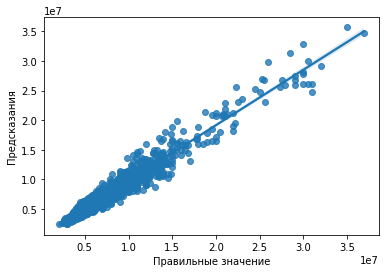

In [18]:
catb = CatBoostRegressor(iterations = 10500, #максимальное количество построенных деревьев
                         random_seed = 5, 
                         learning_rate = 0.01, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 5, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         one_hot_max_size = 30, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = [6, 7, 8, 9, 10, 11]

catb.fit(X_train, Y_train, 
         cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

#Ypred = catb.predict(X_test)

pred_1 = np.exp(catb.predict(X))

pred_train = np.exp(catb.predict(X_train))
mse_train = mse(np.exp(Y_train), pred_train)
print("MAE на обучении:", round(mae(np.exp(Y_train), pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(np.exp(Y_train), pred_train)), 4))
print("MAPE на обучении:", round(mape(np.exp(Y_train), pred_train), 4))
print("R2 на обучении:", round(r2_score(np.exp(Y_train), pred_train), 4))
print("===============================")

pred_test = np.exp(catb.predict(X_test))
mse_test = mse(np.exp(Y_test), pred_test)
print("MAE на тесте:", round(mae(np.exp(Y_test), pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
print("MAPE на тесте:", round(mape(np.exp(Y_test), pred_test), 4))
print("R2 на тесте:", round(r2_score(np.exp(Y_test), pred_test), 4))
print("===============================")

print("MAE:", round(mae(np.exp(Y), pred_1), 4))
print("RMSE:", round(sqrt(mse(np.exp(Y), pred_1)), 4))
print("MAPE:", round(mape(np.exp(Y), pred_1), 4))
print("R2:", round(r2_score(np.exp(Y), pred_1), 4))

sns.regplot(np.exp(Y_test), pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [ ]:
#Все
MAE на обучении: 620492.6963
RMSE на обучении: 880221.4469
MAPE на обучении: 0.0831
R2 на обучении: 0.96
===============================
MAE на тесте: 669642.2866
RMSE на тесте: 959933.0655
MAPE на тесте: 0.0913
R2 на тесте: 0.9466
===============================
MAE: 627866.1367
RMSE: 892633.7657
MAPE: 0.0843
R2: 0.9582

In [19]:
f = catb.get_feature_importance(prettified = True)
f = pd.DataFrame(f)
f

,Feature Id,Importances
0,ОПлощадь,56.633355
1,Районы_2,9.819075
2,Раст_центр_2,8.435786
3,Ремонт_3,7.178877
4,Этажность_1,6.957145
5,ГП_1,4.822212
6,Этаж_4,3.703223
7,ЖК_БД,2.411439
8,Терраса,0.024604
9,Многоуровневость,0.014285


Text(0.5, 0, 'CatBoost Feature Importance')

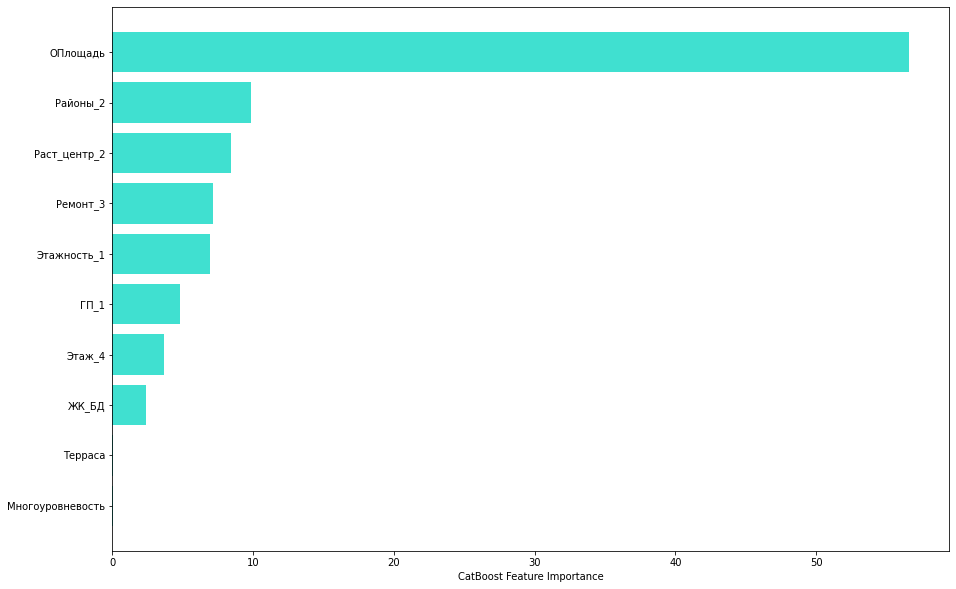

In [20]:
from sklearn.inspection import permutation_importance

feature_names = [
                    'ОПлощадь',
                    #'Этаж_1',
                    #'Этаж_2',
                    #'Этаж_3',
                    'Этаж_4',
                    'Этажность_1',
                    #'Этажность_2',
                    'ГП_1',
                    #'Ремонт_2',
                    'Ремонт_3',
                    #'Долгота',
                    #'Широта',
                    #'Раст_центр_1',
                    'Раст_центр_2',
                    'Районы_2',
                    'Многоуровневость',
                    'Терраса',
                    'ЖК_БД'
                ]
features = np.array(feature_names)

sorted_feature_importance = catb.feature_importances_.argsort()
plt.figure(figsize = (15, 10))
plt.barh(features[sorted_feature_importance], 
         catb.feature_importances_[sorted_feature_importance], 
         color = 'turquoise')
plt.xlabel("CatBoost Feature Importance")

In [21]:
pred_test

array([7400993.11125065, 8030304.04529243, 6752793.65551114, ...,
       8375524.91387216, 5040759.22965903, 3836552.39322801])

In [22]:
pred = pd.DataFrame(pred_1, columns = ['Прогноз'])
pred['ID'] = df_1['ID']
pred

,Прогноз,ID
0,7.104485e+06,3_avito
1,1.063212e+07,5_avito
2,3.920419e+06,6_avito
3,2.808904e+06,9_avito
4,3.409327e+06,10_avito
...,...,...
12260,5.437202e+06,34260_avito
12261,5.745481e+06,34261_avito
12262,5.445184e+06,34262_avito
12263,5.445184e+06,34259_avito


In [23]:
#Сохраняем в Excel
writer = pd.ExcelWriter('Краснодар_прогноз_ln_2.xlsx')
pred.to_excel(writer, 'прогноз')
writer.save()

C:\Users\skapr\AppData\Local\Temp\ipykernel_6068\1878273794.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# Анализ ошибок

In [24]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры_Краснодар/Выборка_Краснодар.xlsx', sheet_name = 0)
df

,ID,All,Мусор,Мусор_1,Мусор_2,Прогноз(0.5),Прогноз(0.32),pred_proba_2,pred_proba_1,Цена,...,Сцепка_к,Исп.2,Unnamed: 63,Сцепка_3,Д_ад,Д_ya,Сравнение,Поиск,Текст,Ссылка
0,1_avito,1,0,NaN,NaN,NaN,NaN,NaN,NaN,12000000,...,,NaN,NaN,9,3к2,NaN,NaN,0.0,"Продается отличная, большая, просторная кварти...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
1,2_avito,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3700000,...,39.005982 45.099499,NaN,NaN,11 39.005982 45.099499,13,13,1.0,0.0,Продаётся уютная квартира в шикарном жк Победн...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
2,3_avito,0,0,0.0,0.0,0.0,0.0,0.005016,0.994984,8399000,...,39.036192 45.010981,NaN,3.0,5 39.036192 45.010981,132,132,1.0,0.0,"Продам 3-комнатную квартиру с Евроремонтом, 65...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
3,4_avito,1,0,NaN,NaN,NaN,NaN,NaN,NaN,12300000,...,,NaN,NaN,4,39/2,NaN,NaN,0.0,Срочная Продажа! Продается большая трехкомнатн...,https://www.avito.ru/krasnodar/kvartiry/3-k._k...
4,5_avito,0,0,0.0,0.0,0.0,0.0,0.060823,0.939177,11000000,...,38.970992 45.101935,NaN,17.0,15 38.970992 45.101935,4/4,4/4,1.0,0.0,"Собственник! Продаю без посредников, Квартира ...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34263,34260_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,6100000,...,39.03868 45.079091,NaN,72.0,4 39.03868 45.079091,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10785272/
34264,34261_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5998000,...,39.043307 45.078162,NaN,32.0,17 39.043307 45.078162,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10541705/
34265,34262_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5500000,...,39.03868 45.079091,NaN,72.0,17 39.03868 45.079091,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10355115/
34266,34259_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5369000,...,39.03868 45.079091,NaN,72.0,20 39.03868 45.079091,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10328304/


In [25]:
df = df[df['All'] == 0]
df = df[df['Прогноз(0.32)'] == 0]
df.reset_index(drop = True, inplace = True)
df

,ID,All,Мусор,Мусор_1,Мусор_2,Прогноз(0.5),Прогноз(0.32),pred_proba_2,pred_proba_1,Цена,...,Сцепка_к,Исп.2,Unnamed: 63,Сцепка_3,Д_ад,Д_ya,Сравнение,Поиск,Текст,Ссылка
0,3_avito,0,0,0.0,0.0,0.0,0.0,0.005016,0.994984,8399000,...,39.036192 45.010981,NaN,3.0,5 39.036192 45.010981,132,132,1.0,0.0,"Продам 3-комнатную квартиру с Евроремонтом, 65...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
1,5_avito,0,0,0.0,0.0,0.0,0.0,0.060823,0.939177,11000000,...,38.970992 45.101935,NaN,17.0,15 38.970992 45.101935,4/4,4/4,1.0,0.0,"Собственник! Продаю без посредников, Квартира ...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
2,6_avito,0,0,0.0,0.0,0.0,0.0,0.047736,0.952264,3999999,...,38.905658 45.093702,NaN,45.0,9 38.905658 45.093702,39/2,39/2,1.0,0.0,Агентам не Беспокоить. Дешевле чем от застройщ...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
3,9_avito,0,0,0.0,0.0,0.0,0.0,0.018983,0.981017,2850000,...,39.029275 45.097119,NaN,7.0,2 39.029275 45.097119,5к3,5к3,1.0,0.0,"Продажа от собственника, никаких риелтор них к...",https://www.avito.ru/krasnodar/kvartiry/kvarti...
4,10_avito,0,0,0.0,0.0,0.0,0.0,0.028921,0.971079,3400000,...,38.897878 45.077226,NaN,13.0,7 38.897878 45.077226,1/3к7,1/3к7,1.0,0.0,Продаётся уютная студия в ЖК« Светлоград» от с...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,34260_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,6100000,...,39.03868 45.079091,NaN,72.0,4 39.03868 45.079091,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10785272/
12261,34261_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5998000,...,39.043307 45.078162,NaN,32.0,17 39.043307 45.078162,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10541705/
12262,34262_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5500000,...,39.03868 45.079091,NaN,72.0,17 39.03868 45.079091,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10355115/
12263,34259_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5369000,...,39.03868 45.079091,NaN,72.0,20 39.03868 45.079091,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10328304/


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2260277.7034


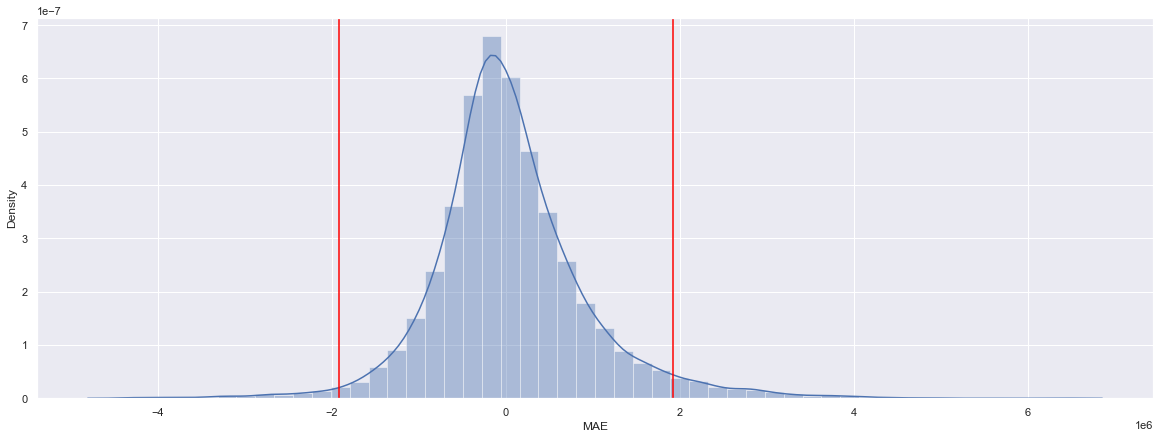

In [48]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAE'])

plt.axvline(-round(sqrt(mse(np.exp(Y_test), pred_test)), 4)*2, color = 'red') #берем полученную RMSE и умножаем на 2, чтобы получить 2std или 97%.
plt.axvline(round(sqrt(mse(np.exp(Y_test), pred_test)), 4)*2, color = 'red')
print(1130138.8517*2)

#MAE на тесте: 669642.2866
#RMSE на тесте: 959933.0655

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


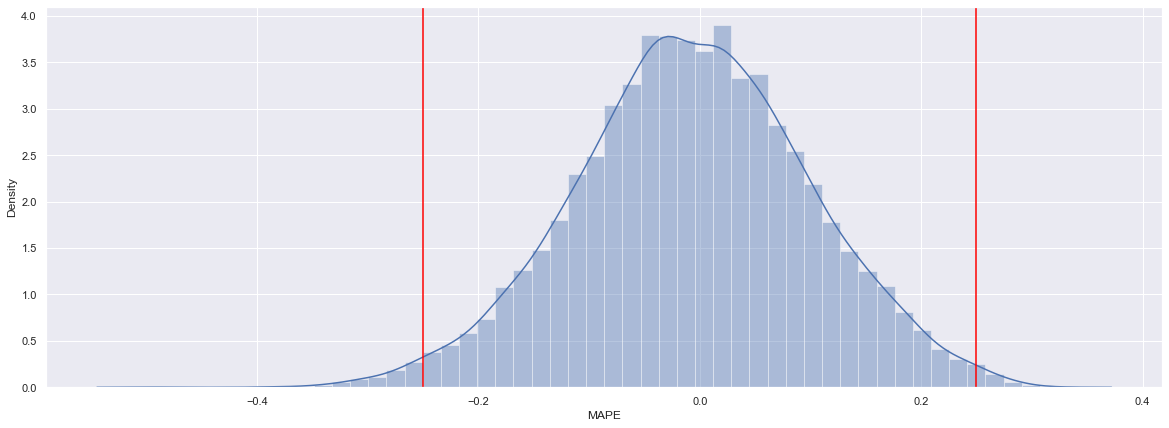

In [27]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAPE'])

plt.axvline(-0.25, color = 'red')
plt.axvline(0.25, color = 'red')

5


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


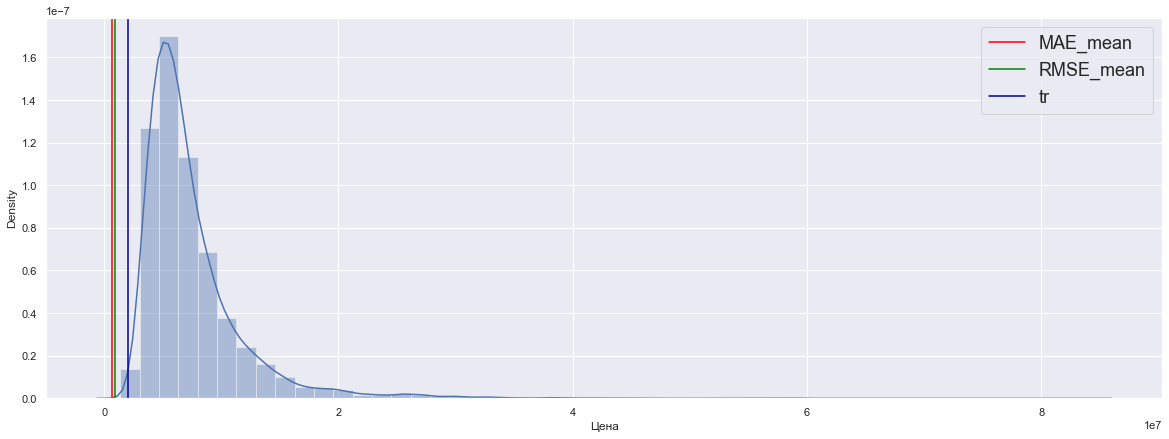

In [49]:
#График строится для понимания: mae и rmse - это много относительно цен квартир или нет?
#MAE_mean: 776758.67782
#RMSE_mean: 1215716.1590000002

tr = 2000000
print(len(df[df['Цена'] <= tr]))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['Цена'])

plt.axvline(round(mae(np.exp(Y_test), pred_test), 4), color = 'red', label = 'MAE_mean')
plt.axvline(round(sqrt(mse(np.exp(Y_test), pred_test)), 4), color = 'green', label = 'RMSE_mean')
plt.axvline(tr, color = 'darkblue', label = 'tr')
#plt.axvline(0.08, color = 'green', label = 'медиана')
plt.legend(prop = {'size': 18})

# Анализ ошибок (престижные+)

In [29]:
df_pres_plus = df[df['ЖК_БД'] == 'престижный+']

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAE', ylabel='Density'>

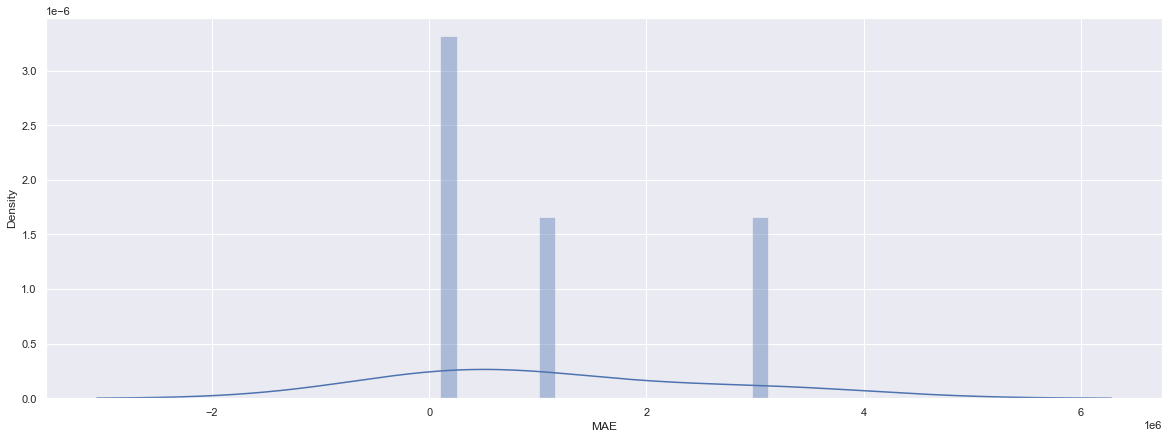

In [30]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_pres_plus['MAE'], bins = 20)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAPE', ylabel='Density'>

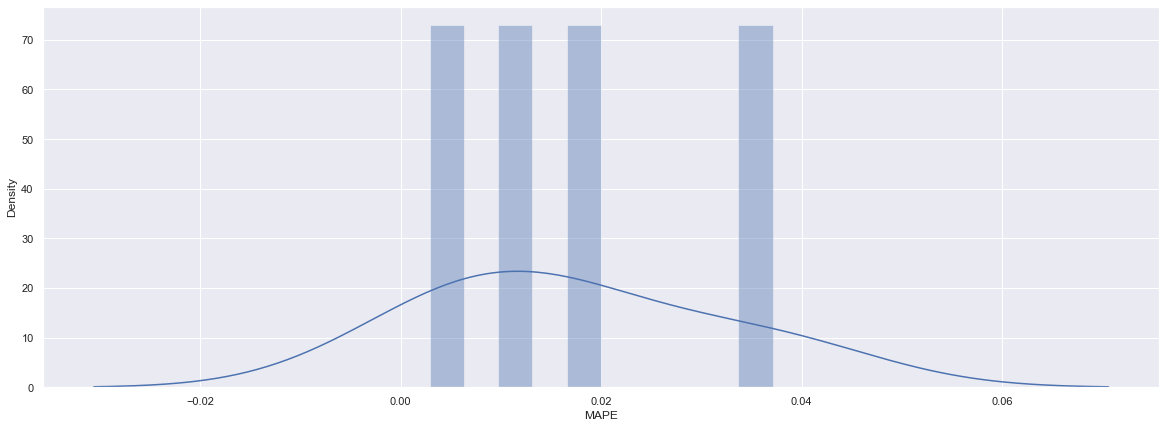

In [31]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_pres_plus['MAPE'], bins = 10)

# Анализ ошибок (престижные)

In [32]:
df_pres = df[df['ЖК_БД'] == 'престижный']

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAE', ylabel='Density'>

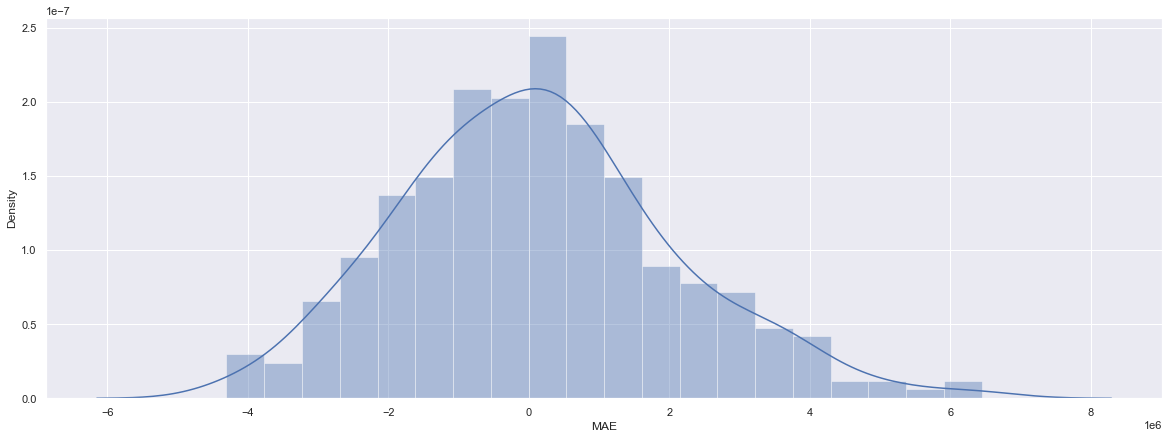

In [33]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_pres['MAE'], bins = 20)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAPE', ylabel='Density'>

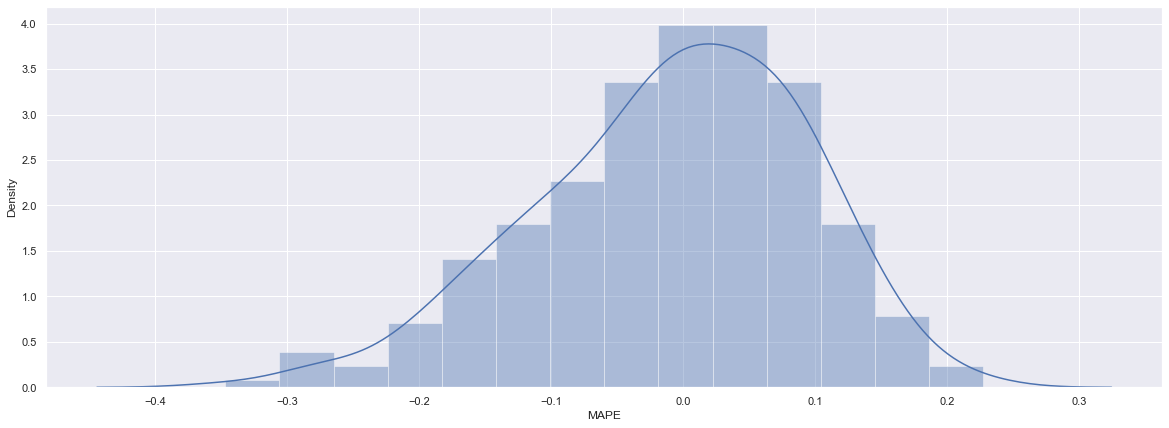

In [34]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_pres['MAPE'])

# Анализ ошибок (премиальный)

In [35]:
df_prem = df[df['Ремонт_3'] == 'премиальный']

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAE', ylabel='Density'>

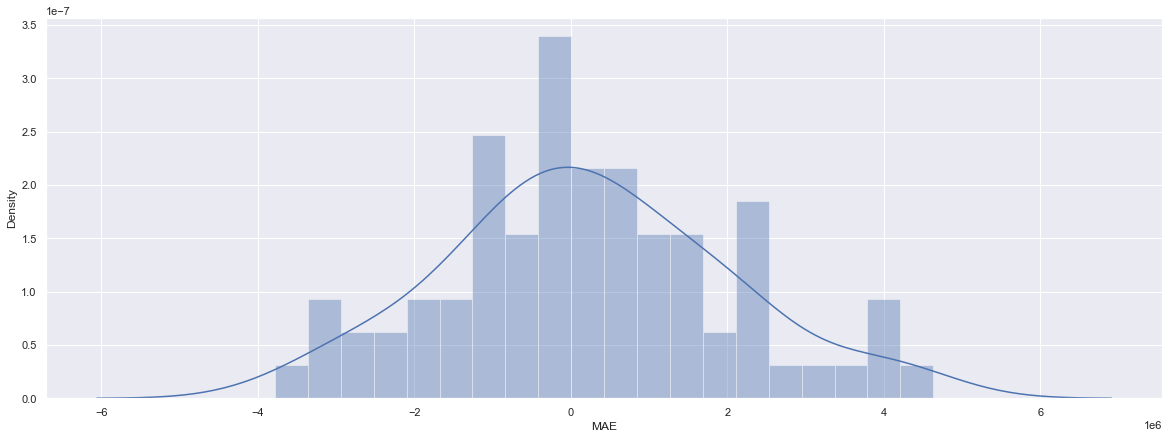

In [36]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_prem['MAE'], bins = 20)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAPE', ylabel='Density'>

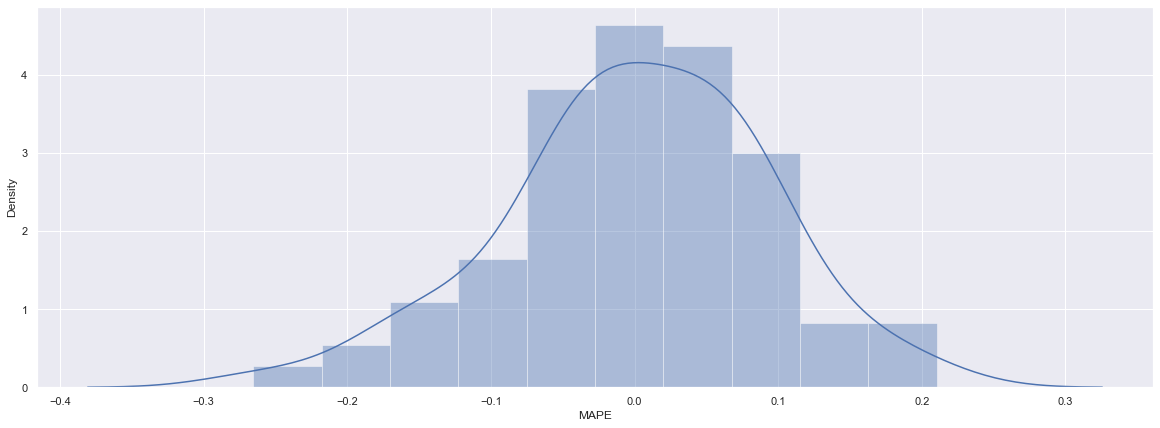

In [37]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_prem['MAPE'])

# Анализ ошибок (без отделки)

In [38]:
df_noot = df[df['Ремонт_3'] == 'без_отделки']

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAE', ylabel='Density'>

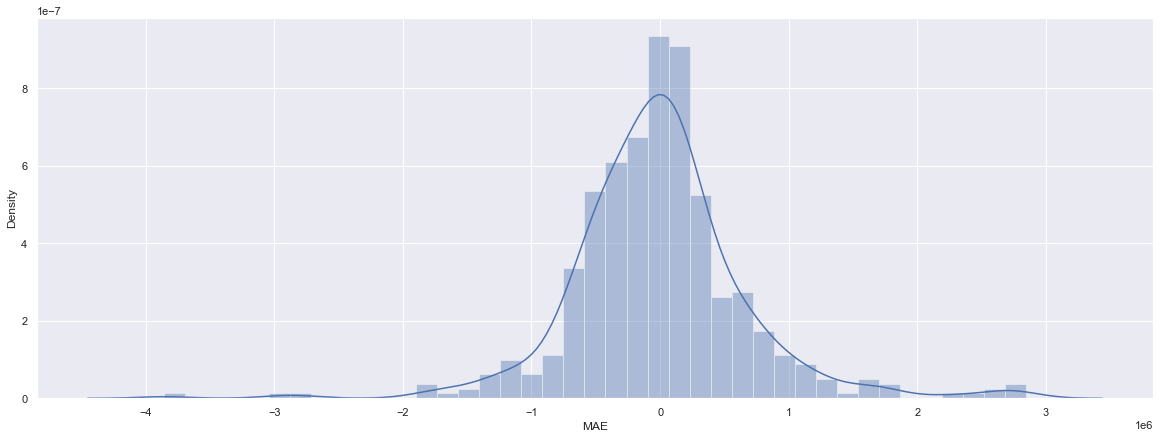

In [39]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_noot['MAE'])

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAPE', ylabel='Density'>

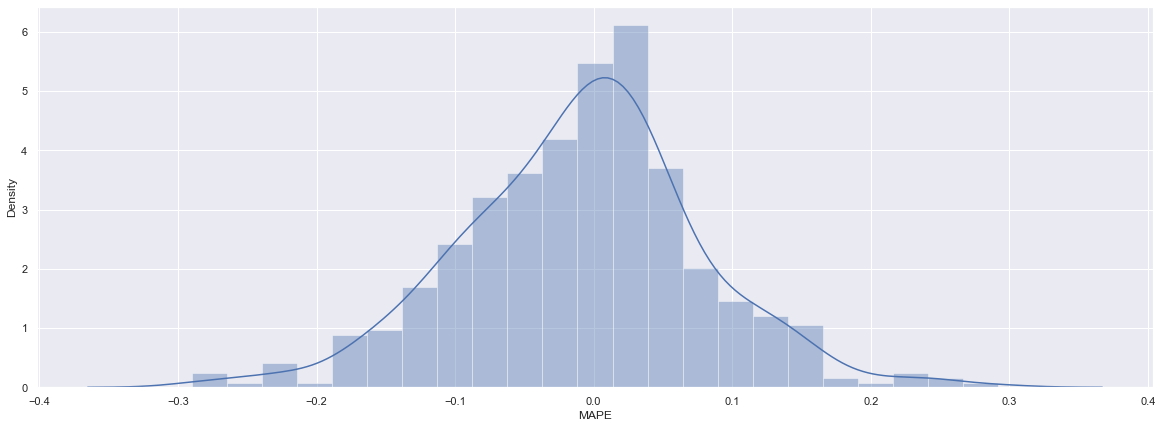

In [40]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_noot['MAPE'])

# Последний этаж

In [41]:
df_fl = df[df['Этаж_3'] == 'последний']

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAE', ylabel='Density'>

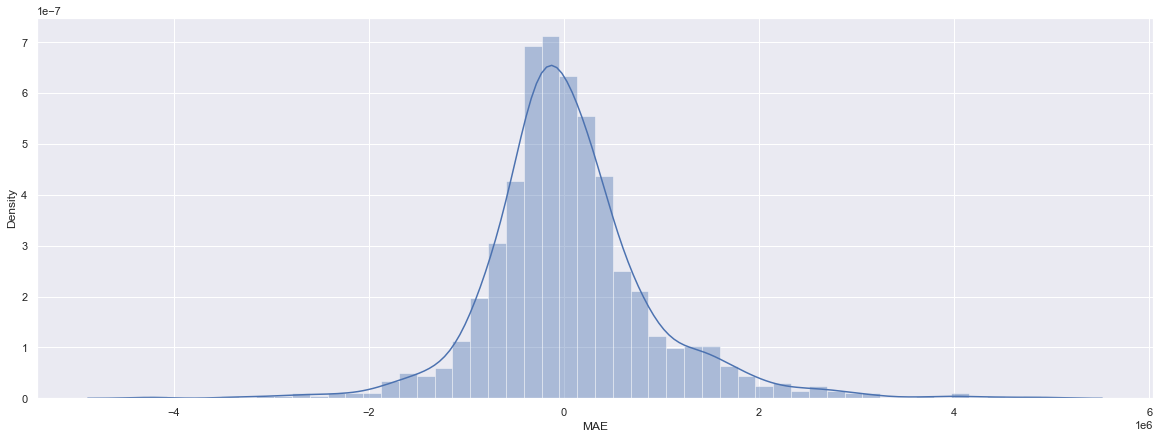

In [42]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_fl['MAE'])

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAPE', ylabel='Density'>

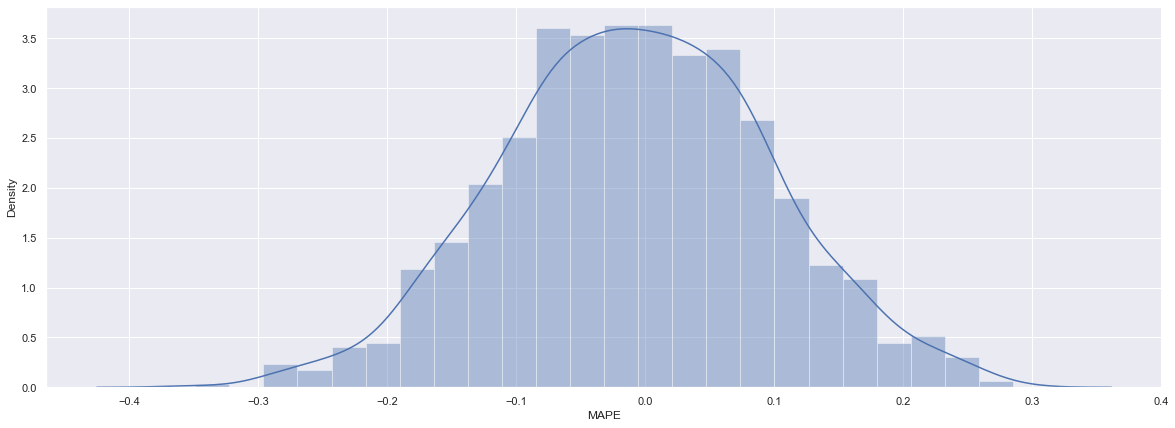

In [43]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_fl['MAPE'])

# Прочее

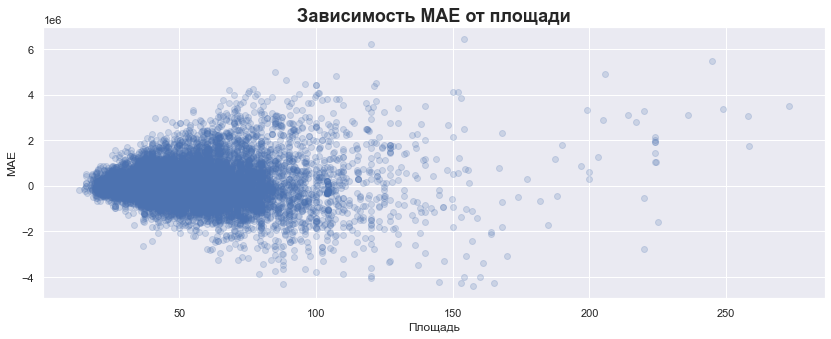

In [44]:
plt.figure(figsize = (14, 5))
plt.scatter(x = df['ОПлощадь'], y = df['MAE'], alpha = 0.2)
#plt.axhline(y = 10, color = 'r', linestyle = '-', alpha = 0.7)
#plt.yticks(np.arange(0, 110, 10))
#plt.xticks(np.arange(1880, 2030, 10))
plt.xlabel('Площадь')
plt.ylabel('MAE')
plt.title('Зависимость MAE от площади', fontweight = 'bold', fontsize = 18)
plt.show()

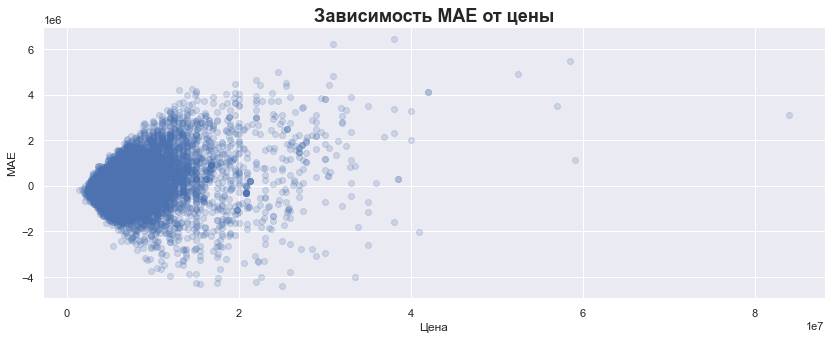

In [45]:
plt.figure(figsize = (14, 5))
plt.scatter(x = df['Цена'], y = df['MAE'], alpha = 0.2)
#plt.axhline(y = 10, color = 'r', linestyle = '-', alpha = 0.7)
#plt.yticks(np.arange(0, 110, 10))
#plt.xticks(np.arange(1880, 2030, 10))
plt.xlabel('Цена')
plt.ylabel('MAE')
plt.title('Зависимость MAE от цены', fontweight = 'bold', fontsize = 18)
plt.show()

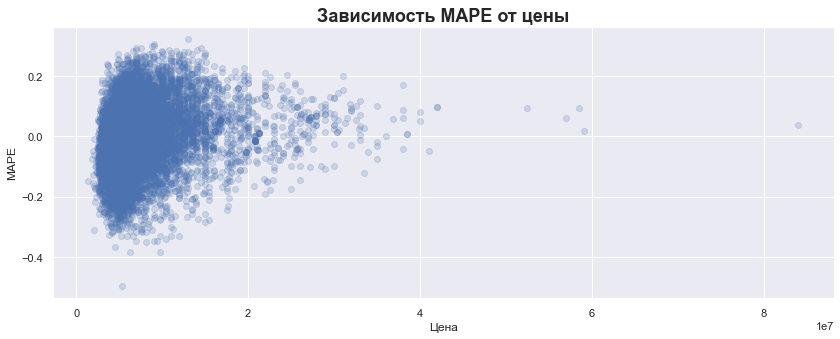

In [50]:
plt.figure(figsize = (14, 5))
plt.scatter(x = df['Цена'], y = df['MAPE'], alpha = 0.2)
#plt.axhline(y = 10, color = 'r', linestyle = '-', alpha = 0.7)
#plt.yticks(np.arange(0, 110, 10))
#plt.xticks(np.arange(1880, 2030, 10))
plt.xlabel('Цена')
plt.ylabel('MAPE')
plt.title('Зависимость MAPE от цены', fontweight = 'bold', fontsize = 18)
plt.show()

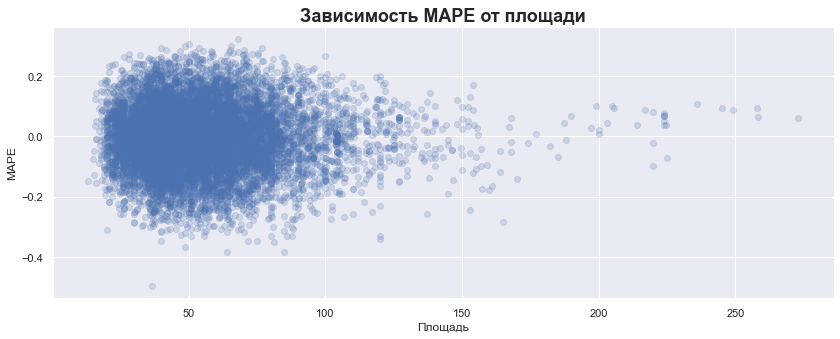

In [47]:
plt.figure(figsize = (14, 5))
plt.scatter(x = df['ОПлощадь'], y = df['MAPE'], alpha = 0.2)
#plt.axhline(y = 10, color = 'r', linestyle = '-', alpha = 0.7)
#plt.yticks(np.arange(0, 110, 10))
#plt.xticks(np.arange(1880, 2030, 10))
plt.xlabel('Площадь')
plt.ylabel('MAPE')
plt.title('Зависимость MAPE от площади', fontweight = 'bold', fontsize = 18)
plt.show()

# Сохранение модели

In [51]:
import pickle

pickle.dump(catb, open('catbmodel_krasnodar_best(ln).pkl', 'wb'))

# Прогноз WFM

In [52]:
model_1 = pickle.load(open('catbmodel_krasnodar_best(ln).pkl', 'rb'))

In [53]:
df_wfm = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры_Краснодар/коор.xlsx', sheet_name = 0)
df_wfm

,Адрес,Мера,Unnamed: 2,Unnamed: 3,Unnamed: 4,ОПлощадь,Этаж,Этаж_2,Этаж_4,Этажность_1,...,Терраса,Торг,Unnamed: 19,model_reg,кв.м,model_reg (торг),кв.м (торг),model_class,отклонение,комментарий
0,"Краснодарский край, городской округ город Крас...",55.2,6320000,114492.753623,2024-01-19,55.2,12,средний,этажи_11-25,24,...,0,-0.0535,6320000,6.762938e+06,122516.999793,6401000,115960.144928,0,-0.012654,Различие несущественное. \nМодель оценивает чу...
1,"Краснодарский край, городской округ город Крас...",34.9,5580000,159885.386819,2024-01-19,34.9,4,средний,этажи_2-5,17,...,0,-0.0535,5580000,4.420177e+06,126652.644674,4184000,119885.386819,0,0.333652,Расчет УОАЗ проведен по верхней границе рынка....
2,"Краснодарский край, г. Краснодар, ул. им. Григ...",49.4,6190000,125303.643725,2024-02-06,49.4,6,средний,этажи_6-10,22,...,0,-0.0535,6190000,6.074070e+06,122956.884000,5749000,116376.518219,0,0.076709,Различие несущественное.
3,"Российская Федерация, Краснодарский край, горо...",70.0,8050000,115000.000000,2024-02-06,70.0,11,средний,этажи_11-25,16,...,0,-0.0435,8050000,9.322342e+06,133176.307227,8917000,127385.714286,0,-0.097230,Объясняется ростом цен.\nМодель оценивает дороже.
4,"Российская Федерация, Краснодарский край, горо...",46.4,6040000,130172.413793,2024-02-06,46.4,12,средний,этажи_11-25,16,...,0,-0.0435,6040000,6.452653e+06,139065.805054,6172000,133017.241379,0,-0.021387,Различие несущественное.\nМодель оценивает чут...
5,"Российская Федерация, Краснодарский край, горо...",35.4,4520000,127683.615819,2024-02-06,35.4,9,средний,этажи_6-10,16,...,0,-0.0435,4520000,4.372409e+06,123514.372723,4182000,118135.593220,0,0.080823,Расчет модели по нижней границе рынка.\nМодель...
6,"Краснодарский край, г. Краснодар, ул. им. Дзер...",44.3,8560000,193227.990971,2024-02-06,44.3,6,средний,этажи_6-10,16,...,0,-0.0535,8560000,8.226697e+06,185704.210835,7787000,175778.781038,1,0.099268,Расчет модели по нижней границе рынка.\nМодель...
7,"Российская Федерация, Краснодарский край, горо...",18.5,3040000,164324.324324,2024-02-06,18.5,7,средний,этажи_6-10,16,...,0,-0.0435,3040000,3.027084e+06,163626.174979,2895000,156486.486486,0,0.050086,Различие несущественное.
8,"Российская Федерация, Краснодарский край, горо...",55.4,6370000,114981.949458,2024-02-06,55.4,4,средний,этажи_2-5,24,...,0,-0.0435,6370000,6.810690e+06,122936.634076,6514000,117581.227437,0,-0.022106,Различие несущественное.\nМодель оценивает чут...
9,"Российская Федерация, Краснодарский край, горо...",18.7,3040000,162566.844920,2024-02-06,18.7,16,последний,последний,16,...,0,-0.0435,3040000,3.050664e+06,163137.138953,2918000,156042.780749,0,0.041809,Различие несущественное.


In [58]:
X_wfm = df_wfm[[
                'ОПлощадь',
                #'Этаж_1',
                #'Этаж_2',
                #'Этаж_3',
                'Этаж_4',
                'Этажность_1',
                #'Этажность_2',
                'ГП_1',
                #'Ремонт_2',
                'Ремонт_3',
                #'Долгота',
                #'Широта',
                #'Раст_центр_1',
                'Раст_центр_2',
                'Районы_2',
                'Многоуровневость',
                'Терраса',
                'ЖК_БД'
             ]]
X_wfm

,ОПлощадь,Этаж_4,Этажность_1,ГП_1,Ремонт_3,Раст_центр_2,Районы_2,Многоуровневость,Терраса,ЖК_БД
0,55.2,этажи_11-25,24,2022,предчистовая,от_5000_до_10000,Любимово,0,0,нет
1,34.9,этажи_2-5,17,2022,предчистовая,от_5000_до_10000,Любимово,0,0,нет
2,49.4,этажи_6-10,22,2022,предчистовая,от_5000_до_10000,Баскет_холл_Горхутор,0,0,нет
3,70.0,этажи_11-25,16,2023,предчистовая,от_5000_до_10000,Западный_обход,0,0,нет
4,46.4,этажи_11-25,16,2023,предчистовая,от_5000_до_10000,Западный_обход,0,0,нет
5,35.4,этажи_6-10,16,2022,предчистовая,от_5000_до_10000,Баскет_холл_Горхутор,0,0,нет
6,44.3,этажи_6-10,16,2023,предчистовая,от_1000_до_3000,Аврора,0,0,нет
7,18.5,этажи_6-10,16,2023,предчистовая,от_5000_до_10000,Западный_обход,0,0,нет
8,55.4,этажи_2-5,24,2022,предчистовая,от_5000_до_10000,Любимово,0,0,нет
9,18.7,последний,16,2023,предчистовая,от_5000_до_10000,Западный_обход,0,0,нет


In [59]:
X_wfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ОПлощадь          22 non-null     float64
 1   Этаж_4            22 non-null     object 
 2   Этажность_1       22 non-null     int64  
 3   ГП_1              22 non-null     int64  
 4   Ремонт_3          22 non-null     object 
 5   Раст_центр_2      22 non-null     object 
 6   Районы_2          22 non-null     object 
 7   Многоуровневость  22 non-null     int64  
 8   Терраса           22 non-null     int64  
 9   ЖК_БД             22 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 1.8+ KB


In [60]:
pred_wfm = np.exp(model_1.predict(X_wfm))

C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [61]:
X_wfm['Прогноз'] = pred_wfm
X_wfm

C:\Users\skapr\AppData\Local\Temp\ipykernel_6068\2380739873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_wfm['Прогноз'] = pred_wfm


,ОПлощадь,Этаж_4,Этажность_1,ГП_1,Ремонт_3,Раст_центр_2,Районы_2,Многоуровневость,Терраса,ЖК_БД,Прогноз
0,55.2,этажи_11-25,24,2022,предчистовая,от_5000_до_10000,Любимово,0,0,нет,6.810768e+06
1,34.9,этажи_2-5,17,2022,предчистовая,от_5000_до_10000,Любимово,0,0,нет,4.782432e+06
2,49.4,этажи_6-10,22,2022,предчистовая,от_5000_до_10000,Баскет_холл_Горхутор,0,0,нет,6.130453e+06
3,70.0,этажи_11-25,16,2023,предчистовая,от_5000_до_10000,Западный_обход,0,0,нет,9.054935e+06
4,46.4,этажи_11-25,16,2023,предчистовая,от_5000_до_10000,Западный_обход,0,0,нет,6.602751e+06
5,35.4,этажи_6-10,16,2022,предчистовая,от_5000_до_10000,Баскет_холл_Горхутор,0,0,нет,4.575241e+06
6,44.3,этажи_6-10,16,2023,предчистовая,от_1000_до_3000,Аврора,0,0,нет,8.770389e+06
7,18.5,этажи_6-10,16,2023,предчистовая,от_5000_до_10000,Западный_обход,0,0,нет,2.976502e+06
8,55.4,этажи_2-5,24,2022,предчистовая,от_5000_до_10000,Любимово,0,0,нет,6.852176e+06
9,18.7,последний,16,2023,предчистовая,от_5000_до_10000,Западный_обход,0,0,нет,2.989128e+06


In [63]:
#Сохраняем в Excel
writer = pd.ExcelWriter('Краснодар_прогноз_wfm.xlsx')
X_wfm.to_excel(writer, 'прогноз')
writer.save()

C:\Users\skapr\AppData\Local\Temp\ipykernel_6068\2529394583.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# 310_прогноз

In [3]:
import pickle

model_1 = pickle.load(open('catbmodel_krasnodar_best(ln).pkl', 'rb'))

In [12]:
df_310 = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры_Краснодар/обогат.xlsx', sheet_name = 0)
df_310

,№ п/п,Адрес ЕГРН,Адрес,Адрес_Ya,Долгота,Широта,Сцепка_к,ОПлощадь,Этаж_1,Этаж_2,...,ГП_1,Ремонт_3,Раст_центр_1,Раст_центр_2,Районы_2,ЖК_БД,Многоуровневость,Терраса,Цена,Цена(кв.м)
0,1,"Краснодарский край, г. Краснодар, пр-кт. Чекис...","Краснодарский край, г. Краснодар, пр-кт. Чекис...","Россия, Краснодар, микрорайон Юбилейный, просп...",38.915961,45.030094,38.915961 45.030094,111.8,3,средний,...,2010,стандартный,4882.357625,от_3000_до_5000,Юбилейный_СХИ_Кожзавод,нет,0,0,19612000.0,175420.393560
1,2,"г Краснодар, Прикубанский внутригородской окру...","г Краснодар, Прикубанский внутригородской окру...","Россия, Краснодар, улица имени Калинина, 13к63",38.914740,45.040967,38.91474 45.040967,35.0,5,средний,...,2009,стандартный,4835.776315,от_3000_до_5000,Юбилейный_СХИ_Кожзавод,нет,0,0,4713000.0,134657.142857
2,3,"Российская Федерация, Краснодарский край, горо...","Российская Федерация, Краснодарский край, горо...","Россия, Краснодар, Старокубанская улица, 139",39.049846,45.025514,39.049846 45.025514,39.6,15,средний,...,2016,стандартный,6048.239704,от_5000_до_10000,ХБК,нет,0,0,6536000.0,165050.505051
3,4,"Российская Федерация, Краснодарский край, горо...","Российская Федерация, Краснодарский край, горо...","Россия, Краснодар, улица имени Героя Ростовско...",38.942165,45.096699,38.942165 45.096699,61.9,7,средний,...,2022,стандартный,6830.000000,от_5000_до_10000,2_я_Площадка,нет,0,0,5763000.0,93101.777060
4,5,"Российская Федерация, Краснодарский край, горо...","Российская Федерация, Краснодарский край, горо...","Россия, Краснодар, улица имени Героя Ростовско...",38.942929,45.096604,38.942929 45.096604,53.1,12,средний,...,2022,стандартный,6747.215345,от_5000_до_10000,2_я_Площадка,нет,0,0,4944000.0,93107.344633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,612,"Российская Федерация, Краснодарский край, горо...","Российская Федерация, Краснодарский край, горо...","Россия, Краснодар, Сормовская улица, 1/6",39.049038,45.023533,39.049038 45.023533,86.5,15,средний,...,2021,стандартный,6052.654491,от_5000_до_10000,ХБК,нет,0,0,15066000.0,174173.410405
164,613,"Российская Федерация, Краснодарский край, г. К...","Российская Федерация, Краснодарский край, г. К...","Россия, Краснодар, Центральный внутригородской...",38.960581,45.019003,38.960581 45.019003,61.2,1,первый,...,1995,стандартный,2697.188779,от_1000_до_3000,Центр,нет,0,0,8051000.0,131552.287582
165,614,"Российская Федерация, Краснодарский край, г. К...","Российская Федерация, Краснодарский край, г. К...","Россия, Краснодар, Центральный внутригородской...",38.960581,45.019003,38.960581 45.019003,48.5,1,первый,...,1995,стандартный,2697.188779,от_1000_до_3000,Центр,нет,0,0,6237000.0,128597.938144
166,615,"Российская Федерация, Краснодарский край, муни...","Российская Федерация, Краснодарский край, муни...","Россия, Краснодар, Дальняя улица, 8к1",38.961910,45.061465,38.96191 45.061465,68.8,11,средний,...,2018,стандартный,2571.609965,от_1000_до_3000,Фестивальный,престижный,0,0,13529000.0,196642.441860


In [13]:
X_310 = df_310[[
                'ОПлощадь',
                #'Этаж_1',
                #'Этаж_2',
                #'Этаж_3',
                'Этаж_4',
                'Этажность_1',
                #'Этажность_2',
                'ГП_1',
                #'Ремонт_2',
                'Ремонт_3',
                #'Долгота',
                #'Широта',
                #'Раст_центр_1',
                'Раст_центр_2',
                'Районы_2',
                'Многоуровневость',
                'Терраса',
                'ЖК_БД'
             ]]
X_310

,ОПлощадь,Этаж_4,Этажность_1,ГП_1,Ремонт_3,Раст_центр_2,Районы_2,Многоуровневость,Терраса,ЖК_БД
0,111.8,этажи_2-5,16,2010,стандартный,от_3000_до_5000,Юбилейный_СХИ_Кожзавод,0,0,нет
1,35.0,этажи_2-5,16,2009,стандартный,от_3000_до_5000,Юбилейный_СХИ_Кожзавод,0,0,нет
2,39.6,этажи_11-25,18,2016,стандартный,от_5000_до_10000,ХБК,0,0,нет
3,61.9,этажи_6-10,17,2022,стандартный,от_5000_до_10000,2_я_Площадка,0,0,нет
4,53.1,этажи_11-25,17,2022,стандартный,от_5000_до_10000,2_я_Площадка,0,0,нет
...,...,...,...,...,...,...,...,...,...,...
163,86.5,этажи_11-25,24,2021,стандартный,от_5000_до_10000,ХБК,0,0,нет
164,61.2,первый,14,1995,стандартный,от_1000_до_3000,Центр,0,0,нет
165,48.5,первый,14,1995,стандартный,от_1000_до_3000,Центр,0,0,нет
166,68.8,неважно,25,2018,стандартный,от_1000_до_3000,Фестивальный,0,0,престижный


In [14]:
pred_t = np.exp(model_1.predict(X_310))

In [15]:
X_310['Прогноз'] = pred_t
X_310

C:\Users\skapr\AppData\Local\Temp\ipykernel_18284\1765764937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_310['Прогноз'] = pred_t


,ОПлощадь,Этаж_4,Этажность_1,ГП_1,Ремонт_3,Раст_центр_2,Районы_2,Многоуровневость,Терраса,ЖК_БД,Прогноз
0,111.8,этажи_2-5,16,2010,стандартный,от_3000_до_5000,Юбилейный_СХИ_Кожзавод,0,0,нет,1.520311e+07
1,35.0,этажи_2-5,16,2009,стандартный,от_3000_до_5000,Юбилейный_СХИ_Кожзавод,0,0,нет,5.304670e+06
2,39.6,этажи_11-25,18,2016,стандартный,от_5000_до_10000,ХБК,0,0,нет,6.342469e+06
3,61.9,этажи_6-10,17,2022,стандартный,от_5000_до_10000,2_я_Площадка,0,0,нет,7.610763e+06
4,53.1,этажи_11-25,17,2022,стандартный,от_5000_до_10000,2_я_Площадка,0,0,нет,6.408740e+06
...,...,...,...,...,...,...,...,...,...,...,...
163,86.5,этажи_11-25,24,2021,стандартный,от_5000_до_10000,ХБК,0,0,нет,1.468668e+07
164,61.2,первый,14,1995,стандартный,от_1000_до_3000,Центр,0,0,нет,9.960629e+06
165,48.5,первый,14,1995,стандартный,от_1000_до_3000,Центр,0,0,нет,7.956031e+06
166,68.8,неважно,25,2018,стандартный,от_1000_до_3000,Фестивальный,0,0,престижный,1.780845e+07


In [16]:
model_2 = pickle.load(open('catbmodel_krasnodar_best(class).pkl', 'rb'))

In [17]:
X_310_2 = df_310[[
                'ОПлощадь',
                #'Этаж_1',
                #'Этаж_2',
                #'Этаж_3',
                'Этаж_4',
                'Этажность_1',
                #'Этажность_2',
                'ГП_1',
                #'Ремонт_2',
                'Ремонт_3',
                #'Долгота',
                #'Широта',
                #'Раст_центр_1',
                'Раст_центр_2',
                'Районы_2',
                'Многоуровневость',
                'Терраса',
                'ЖК_БД',
                'Цена(кв.м)'
             ]]
X_310_2

,ОПлощадь,Этаж_4,Этажность_1,ГП_1,Ремонт_3,Раст_центр_2,Районы_2,Многоуровневость,Терраса,ЖК_БД,Цена(кв.м)
0,111.8,этажи_2-5,16,2010,стандартный,от_3000_до_5000,Юбилейный_СХИ_Кожзавод,0,0,нет,175420.393560
1,35.0,этажи_2-5,16,2009,стандартный,от_3000_до_5000,Юбилейный_СХИ_Кожзавод,0,0,нет,134657.142857
2,39.6,этажи_11-25,18,2016,стандартный,от_5000_до_10000,ХБК,0,0,нет,165050.505051
3,61.9,этажи_6-10,17,2022,стандартный,от_5000_до_10000,2_я_Площадка,0,0,нет,93101.777060
4,53.1,этажи_11-25,17,2022,стандартный,от_5000_до_10000,2_я_Площадка,0,0,нет,93107.344633
...,...,...,...,...,...,...,...,...,...,...,...
163,86.5,этажи_11-25,24,2021,стандартный,от_5000_до_10000,ХБК,0,0,нет,174173.410405
164,61.2,первый,14,1995,стандартный,от_1000_до_3000,Центр,0,0,нет,131552.287582
165,48.5,первый,14,1995,стандартный,от_1000_до_3000,Центр,0,0,нет,128597.938144
166,68.8,неважно,25,2018,стандартный,от_1000_до_3000,Фестивальный,0,0,престижный,196642.441860


In [18]:
X_310_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ОПлощадь          168 non-null    float64
 1   Этаж_4            168 non-null    object 
 2   Этажность_1       168 non-null    int64  
 3   ГП_1              168 non-null    int64  
 4   Ремонт_3          168 non-null    object 
 5   Раст_центр_2      168 non-null    object 
 6   Районы_2          168 non-null    object 
 7   Многоуровневость  168 non-null    int64  
 8   Терраса           168 non-null    int64  
 9   ЖК_БД             168 non-null    object 
 10  Цена(кв.м)        168 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 14.6+ KB


In [19]:
pred_310 = model_2.predict(X_310_2)
pred_proba_310 = pd.DataFrame(model_2.predict_proba(X_310_2), columns = ['pr_1', 'pr_2'])

In [22]:
X_310['Прогноз_2'] = pred_310
X_310['pr_1'] = pred_proba_310['pr_1']
X_310['pr_2'] = pred_proba_310['pr_2']
X_310

C:\Users\skapr\AppData\Local\Temp\ipykernel_18284\1381507273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_310['Прогноз_2'] = pred_310
C:\Users\skapr\AppData\Local\Temp\ipykernel_18284\1381507273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_310['pr_1'] = pred_proba_310['pr_1']
C:\Users\skapr\AppData\Local\Temp\ipykernel_18284\1381507273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,ОПлощадь,Этаж_4,Этажность_1,ГП_1,Ремонт_3,Раст_центр_2,Районы_2,Многоуровневость,Терраса,ЖК_БД,Прогноз,Прогноз_2,pr_1,pr_2
0,111.8,этажи_2-5,16,2010,стандартный,от_3000_до_5000,Юбилейный_СХИ_Кожзавод,0,0,нет,1.520311e+07,0.0,0.658494,0.341506
1,35.0,этажи_2-5,16,2009,стандартный,от_3000_до_5000,Юбилейный_СХИ_Кожзавод,0,0,нет,5.304670e+06,0.0,0.957053,0.042947
2,39.6,этажи_11-25,18,2016,стандартный,от_5000_до_10000,ХБК,0,0,нет,6.342469e+06,0.0,0.995569,0.004431
3,61.9,этажи_6-10,17,2022,стандартный,от_5000_до_10000,2_я_Площадка,0,0,нет,7.610763e+06,1.0,0.298117,0.701883
4,53.1,этажи_11-25,17,2022,стандартный,от_5000_до_10000,2_я_Площадка,0,0,нет,6.408740e+06,1.0,0.439659,0.560341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,86.5,этажи_11-25,24,2021,стандартный,от_5000_до_10000,ХБК,0,0,нет,1.468668e+07,0.0,0.867704,0.132296
164,61.2,первый,14,1995,стандартный,от_1000_до_3000,Центр,0,0,нет,9.960629e+06,0.0,0.987286,0.012714
165,48.5,первый,14,1995,стандартный,от_1000_до_3000,Центр,0,0,нет,7.956031e+06,0.0,0.989659,0.010341
166,68.8,неважно,25,2018,стандартный,от_1000_до_3000,Фестивальный,0,0,престижный,1.780845e+07,0.0,0.558699,0.441301


In [24]:
#Сохраняем в Excel
writer = pd.ExcelWriter('Краснодар_прогноз_310.xlsx')
X_310.to_excel(writer, 'прогноз')
writer.save()

C:\Users\skapr\AppData\Local\Temp\ipykernel_18284\1846277188.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
